# 16-2 Final 卷積層的實作

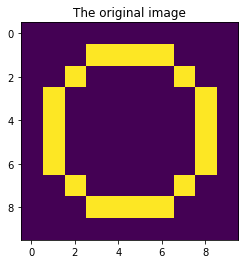

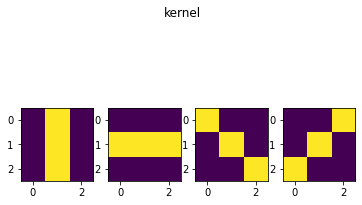

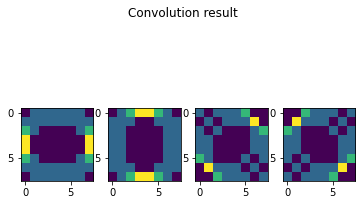

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

# 定義卷積層運算的類別
class Conv:
    # 為了方便解釋, W固定為3x3, 並且不考慮stride和padding
    def __init__(self, W):
        self.W = W
    def f_prop(self, X):
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                # 元素執行內積加總
                out[i,j] = np.dot(self.W.flatten(), x.flatten())
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemyexcontentsdata.blob.core.windows.net/data/5100_cnn/circle.npy') 
X = np.load(local_filename)

plt.imshow(X)
plt.title("The original image", fontsize=12)
plt.show()

# 參考過濾器W2和W3, 來設置程式碼中的過濾器W1, 使其具有檢測垂直線條的能力
W1 = np.array([[0,1,0],
               [0,1,0],
               [0,1,0]])
W2 = np.array([[0,0,0],
               [1,1,1],
               [0,0,0]])
W3 = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])
W4 = np.array([[0,0,1],
               [0,1,0],
               [1,0,0]])

plt.subplot(1,4,1); plt.imshow(W1)
plt.subplot(1,4,2); plt.imshow(W2)
plt.subplot(1,4,3); plt.imshow(W3)
plt.subplot(1,4,4); plt.imshow(W4)
plt.suptitle("kernel", fontsize=12)
plt.show()

# 卷積運算
conv1 = Conv(W1); C1 = conv1.f_prop(X)
conv2 = Conv(W2); C2 = conv2.f_prop(X)
conv3 = Conv(W3); C3 = conv3.f_prop(X)
conv4 = Conv(W4); C4 = conv4.f_prop(X)

plt.subplot(1,4,1); plt.imshow(C1)
plt.subplot(1,4,2); plt.imshow(C2)
plt.subplot(1,4,3); plt.imshow(C3)
plt.subplot(1,4,4); plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()

# 16-3 Final 池化層的實作

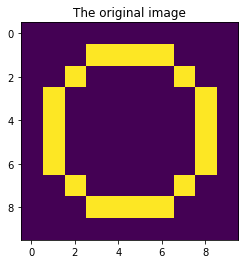

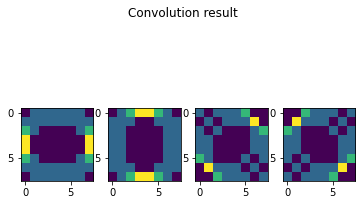

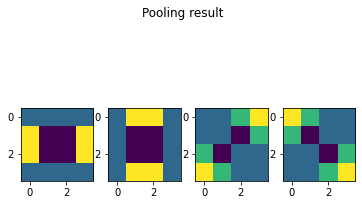

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

# 定義卷積層運算的類別
class Conv:
     # 為了方便解釋, W固定為3x3, 並且不考慮stride和padding
    def __init__(self, W):
        self.W = W
    def f_prop(self, X):
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                out[i,j] = np.dot(self.W.flatten(), x.flatten())
        return out

# 定義池化運算的類別
class Pool:
    #為了方便解釋, 不考慮strides和padding
    def __init__(self, l):
        self.l = l
    def f_prop(self, X):
        l = self.l
        out = np.zeros((X.shape[0]//self.l, X.shape[1]//self.l))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                # 從檢視窗口所劃分出的子區域當中，用np.max()取各區域的最大值出來
                out[i,j] = np.max(X[i*l:(i+1)*l, j*l:(j+1)*l])
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemyexcontentsdata.blob.core.windows.net/data/5100_cnn/circle.npy') 
X = np.load(local_filename)

plt.imshow(X)
plt.title("The original image", fontsize=12)
plt.show()

# 過濾器
W1 = np.array([[0,1,0],
              [0,1,0],
              [0,1,0]])
W2 = np.array([[0,0,0],
              [1,1,1],
              [0,0,0]])
W3 = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])
W4 = np.array([[0,0,1],
              [0,1,0],
              [1,0,0]])

# 卷積運算
conv1 = Conv(W1); C1 = conv1.f_prop(X)
conv2 = Conv(W2); C2 = conv2.f_prop(X)
conv3 = Conv(W3); C3 = conv3.f_prop(X)
conv4 = Conv(W4); C4 = conv4.f_prop(X)

plt.subplot(1,4,1); plt.imshow(C1)
plt.subplot(1,4,2); plt.imshow(C2)
plt.subplot(1,4,3); plt.imshow(C3)
plt.subplot(1,4,4); plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()

# 最大池化運算
pool = Pool(2)
P1 = pool.f_prop(C1)
P2 = pool.f_prop(C2)
P3 = pool.f_prop(C3)
P4 = pool.f_prop(C4)

plt.subplot(1,4,1); plt.imshow(P1)
plt.subplot(1,4,2); plt.imshow(P2)
plt.subplot(1,4,3); plt.imshow(P3)
plt.subplot(1,4,4); plt.imshow(P4)
plt.suptitle("Pooling result", fontsize=12)
plt.show()

# 16-4 Final    用 tf.Keras 建構 CNN 模型

In [5]:
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Flatten 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical

# 建立模型物件
model = Sequential()

# 卷積層與池化層--------------------------------------------------------------
               
model.add(Conv2D(input_shape=(28, 28, 1), 
                 filters=32,
                 kernel_size=(2, 2), 
                 strides=(1, 1), 
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), 
             strides=(1,1)))
model.add(Conv2D(filters=32, 
             kernel_size=(2, 2), 
             strides=(1, 1), 
             padding="same"))
        
model.add(MaxPooling2D(pool_size=(2, 2), 
          strides=(1,1)))
# --------------------------------------------------------------

               

model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               5538048   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

# 16-5 Final    使用 CNN 辨識手寫數字圖片

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
469/469 [==============================] - 36s 8ms/step - loss: 2.6252 - accuracy: 0.5856
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4086 - accuracy: 0.8738
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2894 - accuracy: 0.9099
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2376 - accuracy: 0.9290
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0647 - accuracy: 0.9796
Test loss: 0.0646834746003151
Test accuracy: 0.9796000123023987


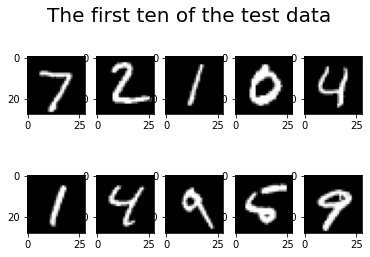

[7 2 1 0 4 1 4 9 5 9]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (No

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 下載數據
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 訓練數據300張, 測試數據100張
# Conv層接收的是4軸維陣列(batch_size, 垂直尺寸, 水平尺寸, 顏色通道數)
# 因為MNIST中的數據是單通道, 含batch_size的話僅是三維數據, 所以要先轉換為四維數據
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 建立模型物件
model = Sequential()

# --------------------------------------------------------------
# 計算準確率
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
# --------------------------------------------------------------

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=128,
          epochs=5,
          verbose=1)

# 計算準確率
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# 將前10張圖片畫出來
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape((28,28)), 'gray')
plt.suptitle("The first ten of the test data",fontsize=20)
plt.show()

# 顯示前10張圖片的預測結果
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

model.summary()

# 16-6 Final    使用 CNN 辨識 cifar10 圖片資料集

170500096/170498071 [==============================] - 3s 0us/step
Epoch 1/10
313/313 [==============================] - 4s 12ms/step - loss: 5.3618 - accuracy: 0.1583 - val_loss: 1.8202 - val_accuracy: 0.3590
Epoch 2/10
313/313 [==============================] - 3s 10ms/step - loss: 1.7912 - accuracy: 0.3259 - val_loss: 1.5666 - val_accuracy: 0.4313
Epoch 3/10
313/313 [==============================] - 3s 10ms/step - loss: 1.6436 - accuracy: 0.3892 - val_loss: 1.4251 - val_accuracy: 0.4889
Epoch 4/10
313/313 [==============================] - 3s 10ms/step - loss: 1.5173 - accuracy: 0.4432 - val_loss: 1.3281 - val_accuracy: 0.5406
Epoch 5/10
313/313 [==============================] - 3s 10ms/step - loss: 1.4283 - accuracy: 0.4812 - val_loss: 1.2610 - val_accuracy: 0.5640
Epoch 6/10
313/313 [==============================] - 3s 10ms/step - loss: 1.3530 - accuracy: 0.5149 - val_loss: 1.1749 - val_accuracy: 0.5994
Epoch 7/10
313/313 [==============================] - 3s 10ms/step - loss: 

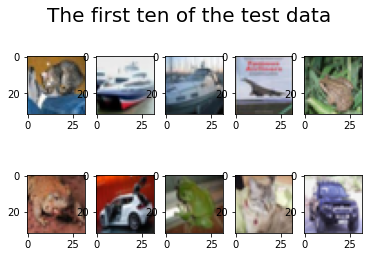

[3 8 8 0 6 6 1 6 3 1]
[3 8 8 8 6 6 1 4 3 1]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_poolin

In [8]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 下載數據
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train
X_test = X_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# 建立模型物件
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 編譯模型
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 訓練模型
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)



# 計算準確率
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# 將測試集前10張圖片畫出來
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
plt.suptitle("The first ten of the test data",fontsize=20)
plt.show()

# 顯示測試集前10張圖片的答案
labels = np.argmax(y_test[:10],axis=1)
print(labels)


# 顯示測試集前10張圖片的預測結果
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

model.summary()